<a href="https://colab.research.google.com/github/SCoyle100/Data-Science-Machine-Learning/blob/main/Youtube_transcript_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

     |████████████████████████████████| 4.0 MB 9.4 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 32.8 MB/s 
     |████████████████████████████████| 596 kB 51.9 MB/s 
     |████████████████████████████████| 6.6 MB 61.7 MB/s 


In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [4]:
youtube_video = "https://www.youtube.com/watch?v=cJIbK9fMc8k"

In [5]:
video_id = youtube_video.split("=")[1]

In [6]:
video_id

'cJIbK9fMc8k'

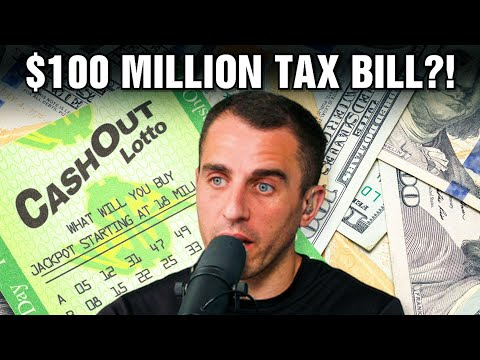

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [9]:
transcript[0:5]

[{'duration': 3.679,
  'start': 0.24,
  'text': 'someone just won over 400 million'},
 {'duration': 2.8,
  'start': 2.24,
  'text': 'dollars in the powerball yeah you know'},
 {'duration': 2.561,
  'start': 3.919,
  'text': 'that lottery where you see all the'},
 {'duration': 2.719,
  'start': 5.04,
  'text': 'billboards and all the signs being'},
 {'duration': 3.119,
  'start': 6.48,
  'text': 'marketed usually by the government'}]

In [10]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

3616


In [11]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [12]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 someone just won over 400 million dollars in the powerball yeah you know that lottery where you see all the billboards and all the signs being marketed usually by the government trying to get you to go gamble somebody just won over 400 million now first the whole idea of the lottery is pretty insane it's a way for them to raise tax revenue and also just treat people as idiots and try to get them to go gamble on a lottery but ultimately in a world that we live where we tell people that the american dream is for anyone in the world to show up here no matter where you come from what language you speak your education level your wealth status who your parents are who you know you can chase a life of happiness and financial security in america we also don't let anyone who isn't rich invest in the private markets well let them go gamble let them do all kinds of other stupid stuff so the lottery generally just doesn't make a lot of sense to me but here's a person who won over 400 

Your max_length is set to 142, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


Summarized text
 If you don't make more than 200 000 a year aka you're rich or you don’t have a net worth of over a million dollars aka you’re rich if you're not rich in america you can't invest in private technology companies . You can't go to some of the best investment opportunities available but you sure as hell can go to the lottery .
input text 
 and buy lottery tickets that'd make a lot of sense to me can't choose both we're gonna let people play the lottery let them invest in technology companies we're gonna not let people invest in technology companies that don't let them buy lottery tickets either but this is just one of those things that shows maybe some of the rules maybe some of the things that are going on in society they aren't actually structured in a way to help the everyday person hey you did you like this video great we make five of them a day and post them here on this channel make sure you subscribe like the video and see you next time
Summarized text
 We're gonna 

In [13]:
len(str(summarized_text))

1257

In [14]:
str(summarized_text)

'[" The lottery generally just doesn\'t make a lot of sense to me but here\'s a person who won over 400 million doll doll . The lottery is a way for the government to raise tax revenue and also just treat people as idiots and try to get them to go gamble on a lottery .", " If you win 473 million dollars in the jackpot you have to pay over 100 million dollars to the government in taxes . Most people don\'t actually take the lottery winnings at the top level in terms of amount they take the one-time cash payment that would come out to about 283.3 million dollars .", " If you don\'t make more than 200 000 a year aka you\'re rich or you don’t have a net worth of over a million dollars aka you’re rich if you\'re not rich in america you can\'t invest in private technology companies . You can\'t go to some of the best investment opportunities available but you sure as hell can go to the lottery .", " We\'re gonna let people play the lottery let them invest in technology companies that don\'t 